### Goals (tentative)

* Characterize distribution of FUV (and EUV?) radiation field 
    - as a function of height from the midplane
        - Comparison of time-averaged z-profile obtained using `zprof` output with the plane-parallel approximation given by Ostriker et al. (2010)
            - See also https://nbviewer.jupyter.org/url/tigress-web.princeton.edu/~jk11/notebook/NCR-RADIATION/notes-on-JFUV-plane-parallel.ipynb?flush_cache=true
        - Comparison using `vtk` output - mass/volume-weighted average vs. plane-parallel solution

    - correlation with gas density and/or thermal pressure (focus on diffuse HI)
        - Wolfire et al. (2003)
    - temporal variation at a fixed point in space?
    - near/far sources?
    
* What fraction of FUV radiation is absorbed by dust grains?
    - What fraction is used to heating up the gas by photoelectric effect?
        - Characterize heating efficiency and grain charging parameter [in different phases]

* Compare radiation field to existing models (e.g., Elmegreen & Parravano 1994; Parravano et al. 2003; Ostriker et al. 2010; Bialy 2020)

* Escape fraction of EUV/FUV photons

* Strength of EUV (or LyC) radiation field in diffuse ionized gas?



### Install pyathena scripts on stellar

https://github.com/PrincetonUniversity/Athena-TIGRESS/wiki/pyathena

### pythena tutorial notebooks

https://github.com/jeonggyukim/pyathena/blob/master/notebook/pyathena-example1.ipynb

https://github.com/jeonggyukim/pyathena/blob/master/notebook/pyathena-example2.ipynb

### Setting up .pythonrc.py file (optional)

* Add `export PYTHONSTARTUP="$HOME/.pythonrc.py"` to `~/.bashrc`
* Add `export PYTHONPATH="/tigress/MYID/pyathena:$PYTHONPATH` to `~/.bashrc`
* Alternatively, add the path manually `sys.path.append('PATH_TO_PYATHENA')` 

In [1]:
# %load /tigress/jk11/.pythonrc.py

# import pyathena as pa

### Wiki page for TIGRESS-NCR

https://github.com/PrincetonUniversity/Athena-TIGRESS/wiki/TIGRESS-NCR


#### Models to be analyzed

https://github.com/PrincetonUniversity/Athena-TIGRESS/wiki/TIGRESS-NCR#default-models-to-be-analyzed

### TIGRESS-NCR simulations

In [2]:
# Model directories
print(os.listdir('/tigress/changgoo/TIGRESS-NCR'))

['move_files.py', 'LGR4_4pc_NCR.UV', 'storage.082721', 'R8_8pc_NCR.full.q0', 'R8_8pc_NCR.full.B1', 'move_from_pleiades', 'R8_8pc_NCR.full.B1.rovib', 'LGR4_4pc_NCR.SN', 'R8_4pc_NCR.full', 'LGR4_8pc_NCR.full.rovib', 'LGR4_4pc_NCR.classic', 'LGR4_combined_figures', 'R8_8pc_NCR.full', 'R8_combined_figures', 'LGR4_4pc_NCR.full.norun', 'restart_files', 'storage.052521', 'LGR4_4pc_NCR.full.Om30', 'LGR4_8pc_NCRSP.full.y2.norun', 'R8_8pc_NCR.full.norot', 'LGR4_8pc_NCR.full', 'R8_8pc_NCR.SN', 'R8_16pc_NCR.full', 'R8_8pc_NCR.full.hd', 'LGR4_4pc_NCR.full.Z1.xy1024.eps1.e-8', 'storage.091321', 'LGR4_4pc_NCR.full.B', 'LGR4_4pc_NCR.full', 'R8_8pc_NCR.UV', 'LGR4_8pc_NCR.full.B', 'LGR4_4pc_NCR_Z03', 'R8_8pc_NCR.classic', 'R8_8pc_NCR.UV.b10', 'LGR4_2pc_NCR.full']


In [3]:
models = dict(
    R8_4pc='/tigress/changgoo/TIGRESS-NCR/R8_4pc_NCR.full/',
    R8_8pc='/tigress/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.B1/',
    R8_16pc='/tigress/changgoo/TIGRESS-NCR/R8_16pc_NCR.full/',
    LGR4_2pc='/tigress/changgoo/TIGRESS-NCR/LGR4_2pc_NCR.full/',
    LGR4_4pc='/tigress/changgoo/TIGRESS-NCR/LGR4_4pc_NCR.full/',
    LGR4_8pc='/tigress/changgoo/TIGRESS-NCR/LGR4_8pc_NCR.full/',
)

# Load all simulations
sa = pa.LoadSimTIGRESSNCRAll(models)
sa.models

['R8_4pc', 'R8_8pc', 'R8_16pc', 'LGR4_2pc', 'LGR4_4pc', 'LGR4_8pc']

In [4]:
savdir = '/tigress/jk11/NCR-RAD/'
s = sa.set_model('R8_16pc', savdir=savdir)
s.files.keys() # output file types

dict_keys(['athinput', 'timeit', 'hst', 'sn', 'vtk', 'vtk_id0', 'starpar_vtk', 'zprof', 'rst'])

In [5]:
# print vtk snapshot numbers, number of snapshots
print(s.nums[0], s.nums[-1], len(s.nums))

0 1000 1001


In [6]:
# print domain information in code units (pc)
s.domain

{'Nx': array([ 64,  64, 384]),
 'ndim': 3,
 'le': array([ -512,  -512, -3072]),
 're': array([ 512,  512, 3072]),
 'Lx': array([1024, 1024, 6144]),
 'dx': array([16., 16., 16.]),
 'center': array([0., 0., 0.]),
 'time': None}

# Adopted simulation parameters and code configuration

In [7]:
print(s.par.keys())
print(s.par['opacity']) # Dust cross sections per H (for PH/LW/PE) and photoionization cross sections (for PH) in cgs units

dict_keys(['job', 'log', 'output1', 'output2', 'output3', 'output4', 'output5', 'time', 'domain1', 'problem', 'feedback', 'cooling', 'opacity', 'radps', 'configure'])
{'sigma_dust_PH0': 1e-21, 'sigma_dust_LW0': 2e-21, 'sigma_dust_PE0': 1e-21, 'sigma_HI_PH': 3e-18, 'sigma_H2_PH': 6e-18}


### Units (see `pyathena/pyathena/utils/unit.py`)

In [8]:
u = s.u # Equivalently, u = pa.Units()

In [9]:
pa.Units(muH=1.4).density

<Quantity 2.34335273e-24 g / cm3>

* Length $[L] : 1\,{\rm pc}$  
    - `1 code length` $\leftrightarrow 1\,{\rm pc}$
* Velocity $[L/T] : 1\,{\rm km}\,{\rm s}^{-1}$
    - `1 code velocity` $\leftrightarrow 1\,{\rm km}\,{\rm s}^{-1}$
* Density $[M/L^3] : 1.4 m_{\rm H}\,{\rm cm}^{-3}$ (the factor 1.4 accounts for ~9.5\% Helium and other heavy elements)
    - `1 code density` $\leftrightarrow 1 {\rm hydrogen}\,{\rm nucleus}\,{\rm cm}^{-3}$ or $1.4 m_{\rm H}\,{\rm cm}^{-3} = 2.34 \times 10^{-24}\,{\rm g}\,{\rm cm}^{-3}$

**All other units can be derived from the above three.**

For example,

* `1 code mass` $= 1.4 m_{\rm H}\,{\rm cm}^{-3} \times (1\,{\rm pc})^3 \approx 0.0353 M_{\odot}$


* `1 code time` $= 1\,{\rm pc} / (1\,{\rm km}\,{\rm s}^{-1}) \approx 0.978\,{\rm Myr}$


* `1 code energy density` $= 1.4 m_{\rm H}\,{\rm cm}^{-3} \times (1\,{\rm km}\,{\rm s}^{-1})^2 = 2.34 \times 10^{-14}\,{\rm erg}\,{\rm cm}^{-3}$.

In [10]:
print(u)

In [11]:
# these are astropy quantity objects
print('length: ',u.length)
print('velocity: ', u.velocity)
print('density: ', u.density)
print('time: ', u.time)
print('mass: ', u.mass)
print('energy density: ', u.energy_density)
print('energy_flux: ', u.energy_flux)
print('momentum flux', u.momentum_flux)

length:  1.0 pc
velocity:  1.0 km / s
density:  2.3433527307859195e-24 g / cm3
time:  30856775814913.676 s
mass:  0.0346244904274392 solMass
energy density:  2.34335273078592e-14 erg / cm3
energy_flux:  7.041135837168312e+41 erg / (kpc2 yr)
momentum flux 0.03541088756865028 km solMass / (kpc2 s yr)


In [12]:
# %load /tigress/jk11/pyathena/pyathena/tigress_ncr/zprof.py

In [13]:
# %load /tigress/jk11/pyathena/pyathena/util/units.py

In [14]:
(u.energy_density/(4*np.pi*au.sr)*ac.c).to('erg cm-2 sr-1 s-1') # intensity unit in cgs

<Quantity 5.59047235e-05 erg / (cm2 s sr)>

In [15]:
# these are floats
# You can convert from code units to physical units by **multiplying** these constants
print(u.cm, u.pc, u.Myr, u.kms, u.Msun, u.eV)

3.085677581491367e+18 1.0 0.9777922216807893 1.0 0.0346244904274392 4.297134103243345e+53


In [16]:
u.time.to('Myr').value, u.Myr

(0.9777922216807893, 0.9777922216807893)

In [17]:
u.length.to('cm').value, u.cm

(3.085677581491367e+18, 3.085677581491367e+18)

## Load vtk output

In [18]:
s = pa.LoadSimTIGRESSNCR('/tigress/changgoo/TIGRESS-NCR/R8_16pc_NCR.full/')
num = s.nums[200]
ds = s.load_vtk(num) #, load_method='pyathena') # Default load_method is pyathena
print(ds, ds.domain['time'])

<pyathena.io.read_vtk.AthenaDataSet object at 0x153508133100> 200.0042


For analysis with [yt](https://yt-project.org/doc/quickstart/index.html), specifying load_method='yt' will set `units_override` parameter automatically:

In [19]:
# dsyt = s.load_vtk(s.nums[200], load_method='yt')

## Fields 

* see `Athena-TIGRESS/src/vtk_dump.c` and `pyathena/pyathena/fields/fields.py` for source codes

In [20]:
print('Field list:', ds.field_list)

Field list: ['density', 'velocity', 'pressure', 'cell_centered_B', 'gravitational_potential', 'heat_rate', 'cool_rate', 'net_cool_rate', 'CR_ionization_rate', 'rad_energy_density_PH', 'rad_energy_density_LW', 'rad_energy_density_PE', 'rad_energy_density_LW_diss', 'specific_scalar[0]', 'specific_scalar[1]', 'xHI', 'xH2', 'xe']


* Variables in `field_list` are from raw vtk files and given in code units in general.


* `TIGRESS-NCR` simulations have the following fields in vtk dumps:
    - Basic hydro variables: gas `density`, `velocity`, and (thermal) `pressure`.
    - With self-gravity: `gravitational_potential` (in units of `(velocity unit)^2`)
    - With MHD: `cell_centered_B` (in units of square root of `(energy_density unit)/(4pi)`)
    - With adaptive ray tracing: `rad_energy_density_[freq_bin]`, where the frequency bin is one of the following
        - PH : ${\rm H}$-, ${\rm H}_2$-photoionizing; or Lyman continuum ($\lambda <91.2\,{\rm nm}$)
        - LW : Lyman-Werner ($91.2\,{\rm nm} < \lambda < 110.8\,{\rm nm}$)
        - PE : Photoelectric ($110.8\,{\rm nm} < \lambda < 206.8\,{\rm nm}$)
        - LW_diss : ${\rm H}_2$-dissociating (($91.2\,{\rm nm} < \lambda < 110.8\,{\rm nm}$ with self-sheilding)
    - Gas temperature: $T = P/[(1.1 + x_e - x_{\rm H_2}) n_{\rm H} k_{\rm B}]$ (in units of Kelvin)
    - Electron fraction: `xe` defined as $0 \le x_e \equiv n_e/n_{\rm H} \le 1.2$
    - H2 fraction: `xH2` defined as $0 \le x_{\rm H_2} \equiv n_{\rm H_2}/n_{\rm H} \le 0.5$
    - Passive scalars for metals in the background medium and metals newly produced by SNe: `specific_scalar[0]` and `specific_scalar[1]`
    - Cooling/heating related quantities (these are non-essential but dumped for convenience):
        - Volumetric instantaneous heating and cooling rates: `heat_rate` and `cool_rate` (**given in cgs units** (erg/cm^3/s)).
        - `CR_ionization_rate` : primary cosmic ray ionization rate in cgs units (`sec^-1`)


* **What we need for the ncr-radiation project** are quantities derived from `density`, `pressure`, `rad_energy_density_XX`. For phase selection (and possibly quantifying grain charging parameter), we will also need `T`, `xH2`, and `xe`.

In [21]:
print('Derived field list:', ds.derived_field_list)

Derived field list: ['rho', 'nH', 'pok', 'r', 'vmag', 'vr', 'vx', 'vy', 'vz', 'cs', 'csound', 'Mr', 'Mr_abs', 'T', 'Td', 'cool_rate', 'heat_rate', 'net_cool_rate', 'Lambda_cool', 'nHLambda_cool', 'nHLambda_cool_net', 'Gamma_heat', 't_cool', 'vAmag', 'vAx', 'vAy', 'vAz', 'Bx', 'By', 'Bz', 'Bmag', 'nH2', '2nH2', 'xH2', '2xH2', 'nHI', 'xHI', 'nHII', 'xHII', 'nHn', 'xn', 'ne', 'nesq', 'xe', 'xCI', 'nCI', 'xCII', 'xi_CR', 'T_alt', 'chi_PE', 'chi_LW', 'chi_FUV', 'Erad_LyC', 'Erad_FUV', 'heat_ratio', 'NHeff', 'chi_H2', 'chi_CI', 'fshld_H2', 'j_X']


In [22]:
# Load number density of hydrogen, EUV/FUV radiation fields (in code units), etc.
d = ds.get_field(['nH','rad_energy_density_PE','rad_energy_density_LW','chi_FUV','T'])

* Resources for xarray tutorials can be found here:

https://xarray.pydata.org/en/stable/tutorials-and-videos.html

In [23]:
d

<xarray.Dataset>
Dimensions:                (x: 64, y: 64, z: 384)
Coordinates:
  * x                      (x) float64 -504.0 -488.0 -472.0 ... 488.0 504.0
  * y                      (y) float64 -504.0 -488.0 -472.0 ... 488.0 504.0
  * z                      (z) float64 -3.064e+03 -3.048e+03 ... 3.064e+03
Data variables:
    rad_energy_density_PE  (z, y, x) float32 1.393 1.393 1.393 ... 1.276 1.276
    rad_energy_density_LW  (z, y, x) float32 0.2307 0.2307 ... 0.2898 0.2898
    chi_FUV                (z, y, x) float32 0.4251 0.4251 ... 0.4102 0.4102
    T                      (z, y, x) float32 1.106e+06 1.006e+06 ... 1.444e+06
    nH                     (z, y, x) float32 0.0003833 0.000415 ... 0.0003379
Attributes:
    all_grid_equal:  True
    ngrid:           1
    le:              [ -512.  -512. -3072.]
    re:              [ 512.  512. 3072.]
    dx:              [16. 16. 16.]
    Lx:              [1024. 1024. 6144.]
    center:          [0. 0. 0.]
    Nx:              [ 64  64 384]
    ndim:            3
    time:            200.0042
    dfi:             {'rho': {'field_dep': ['density'], 'func': <function set...

In [24]:
d.coords

Coordinates:
  * x        (x) float64 -504.0 -488.0 -472.0 -456.0 ... 456.0 472.0 488.0 504.0
  * y        (y) float64 -504.0 -488.0 -472.0 -456.0 ... 456.0 472.0 488.0 504.0
  * z        (z) float64 -3.064e+03 -3.048e+03 ... 3.048e+03 3.064e+03

In [25]:
d.x # or d['x']

<xarray.DataArray 'x' (x: 64)>
array([-504., -488., -472., -456., -440., -424., -408., -392., -376., -360.,
       -344., -328., -312., -296., -280., -264., -248., -232., -216., -200.,
       -184., -168., -152., -136., -120., -104.,  -88.,  -72.,  -56.,  -40.,
        -24.,   -8.,    8.,   24.,   40.,   56.,   72.,   88.,  104.,  120.,
        136.,  152.,  168.,  184.,  200.,  216.,  232.,  248.,  264.,  280.,
        296.,  312.,  328.,  344.,  360.,  376.,  392.,  408.,  424.,  440.,
        456.,  472.,  488.,  504.])
Coordinates:
  * x        (x) float64 -504.0 -488.0 -472.0 -456.0 ... 456.0 472.0 488.0 504.0

In [26]:
print(type(d.x.data))
d.x.data # numpy array

<class 'numpy.ndarray'>


array([-504., -488., -472., -456., -440., -424., -408., -392., -376.,
       -360., -344., -328., -312., -296., -280., -264., -248., -232.,
       -216., -200., -184., -168., -152., -136., -120., -104.,  -88.,
        -72.,  -56.,  -40.,  -24.,   -8.,    8.,   24.,   40.,   56.,
         72.,   88.,  104.,  120.,  136.,  152.,  168.,  184.,  200.,
        216.,  232.,  248.,  264.,  280.,  296.,  312.,  328.,  344.,
        360.,  376.,  392.,  408.,  424.,  440.,  456.,  472.,  488.,
        504.])

In [27]:
list(d.variables)

['rad_energy_density_PE',
 'rad_energy_density_LW',
 'x',
 'y',
 'z',
 'chi_FUV',
 'T',
 'nH']

**The code below basically demonstrates how the derived field `chi_FUV` (FUV radiation field normalized by the Draine field) is calculated.**

In [28]:
# FUV = PE + LW
d['rad_energy_density_FUV'] = d['rad_energy_density_LW'] + d['rad_energy_density_PE']

In [29]:
# radiation energy density in cgs units
d['rad_energy_density_FUV_cgs'] = d['rad_energy_density_FUV']*u.energy_density

In [30]:
# Draine unit in cgs units
rad_energy_density_FUV_ISRF_cgs = s.par['cooling']['Erad_PE0'] + s.par['cooling']['Erad_LW0']
rad_energy_density_FUV_ISRF_cgs

8.948e-14

In [31]:
d['chi_FUV'] == d['rad_energy_density_FUV_cgs']/rad_energy_density_FUV_ISRF_cgs

<xarray.DataArray (z: 384, y: 64, x: 64)>
array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
...
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])
Coordinates:
  * x        (x) float64 -504.0 -488.0 -472.0 -456.0 ... 456.0 472.0 488.0 504.0
  * y        (y) float64 -504.0 -488.0 -472.0 -456.0 ... 456.0 472.0 488.0 504.0
  * z        (z) float64 -3.064e+03 -3.048e+03 ... 3.048e+03 3.064e+03

In [32]:
# Select midplane region
zmin = -300
zmax = 300
d1 = d.sel(z=slice(zmin,zmax))

# Get data as 1d array
z = d1['z'].data.flatten()
chi = d1['chi_FUV'].data.flatten()
nH = d1['nH'].data.flatten()
T = d1['T'].data.flatten()
z.shape, chi.shape, nH.shape, 

((38,), (155648,), (155648,))

### Plot slices

{'norm': <matplotlib.colors.LogNorm object at 0x1534fcf2eb20>, 'cmap': 'viridis', 'cbar_kwargs': {'label': '$\\chi_{\\rm FUV}$'}}


[None, None]

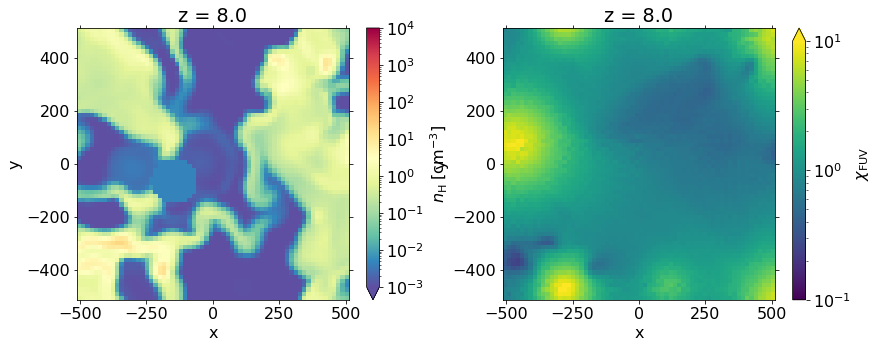

In [33]:
fig,axes = plt.subplots(1,2,figsize=(14,5))
d1['nH'].sel(z=0, method='nearest').plot.imshow(ax=axes[0], **d.dfi['nH']['imshow_args'])
# Adjust the range for chi_FUV (default range is (1e-4,1e4))
print(d.dfi['chi_FUV']['imshow_args'])
d.dfi['chi_FUV']['imshow_args']['norm'] = mpl.colors.LogNorm(1e-1,1e1)
d1['chi_FUV'].sel(z=0, method='nearest').plot.imshow(ax=axes[1], **d.dfi['chi_FUV']['imshow_args'])
plt.setp(axes, aspect='equal')

# See for more options for xarray imshow
# http://xarray.pydata.org/en/stable/generated/xarray.plot.imshow.html

## 2d histograms

In [34]:
bins_x = np.logspace(-3,3,100)
bins_y = np.logspace(-3,3,200)
# Volume weighted histograms
H, bine_x, bine_y =  np.histogram2d(x=nH, y=chi, bins=(bins_x,bins_y), density=False)
# density-weighted histograms
Hw, bine_x, bine_y =  np.histogram2d(x=nH, y=chi, bins=(bins_x,bins_y), weights=nH, density=False)

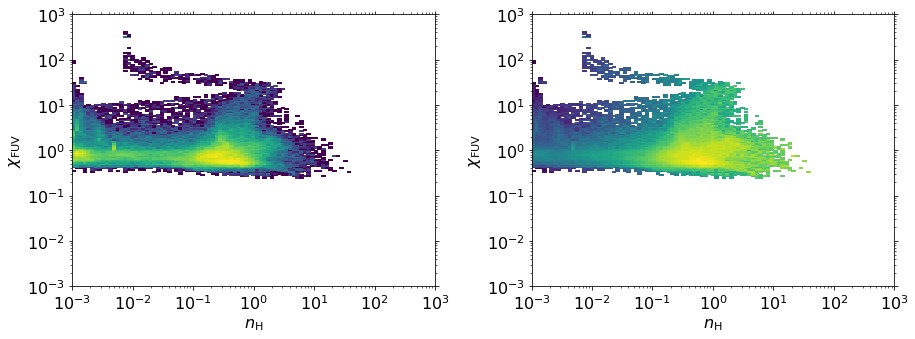

In [35]:
fig,axes = plt.subplots(1,2,figsize=(13,5))
p1 = axes[0].pcolormesh(bine_x, bine_y, H.T, norm=LogNorm())
p2 = axes[1].pcolormesh(bine_x, bine_y, Hw.T, norm=LogNorm())
plt.setp(axes, xscale='log', yscale='log', xlabel=r'$n_{\rm H}$', ylabel=r'$\chi_{\rm FUV}$');
plt.tight_layout()

### Calculate mass/volume-weighted z-profiles (and compare volume-weighted one with zprof)

In [36]:
# http://xarray.pydata.org/en/stable/examples/area_weighted_temperature.html#Weighted-mean
d1w = d1.weighted(d['nH'])

In [37]:
d1m = d1.mean(dim=('x','y'))
d1wm = d1w.mean(dim=('x','y'))

In [38]:
zp = s.read_zprof('whole', savdir=savdir)
zp_ = zp.sel(time=200*u.Myr, method='nearest') # CAUTION: time should be given in Myr
zp_ = zp_.sel(z=slice(zmin,zmax))

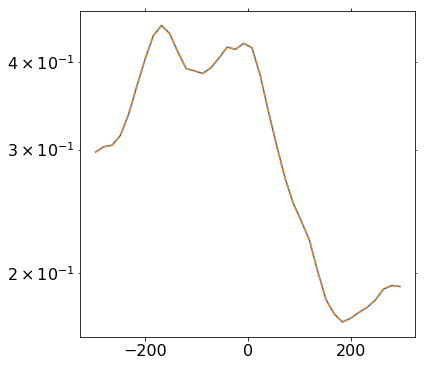

In [39]:
plt.semilogy(d1m['z'], d1m['nH'])
plt.semilogy(zp_.z, zp_.d, '--')

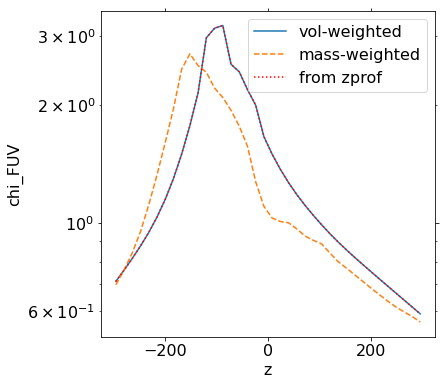

In [41]:
plt.semilogy(d1m['z'], d1m['chi_FUV'], label='vol-weighted')
plt.semilogy(d1wm['z'], d1wm['chi_FUV'],'--', label='mass-weighted')
plt.semilogy(zp_.z, (zp_.Erad1 + zp_.Erad2)*s.u.energy_density.cgs.value/rad_energy_density_FUV_ISRF_cgs,
             c='red', ls=':', label='from zprof')
plt.setp(plt.gca(), xlabel='z', ylabel='chi_FUV')
plt.legend()

## Read history dump

source codes: `Athena-TIGRESS/src/dump_history.c`, `Athena-TIGRESS/prob/tigress_ncr.c`, `pyathena/tigress_ncr/hst.py`


In [41]:
h = s.read_hst()

In [42]:
h.columns

Index(['time_code', 'time', 'time_orb', 'dt_code', 'dt', 'mass', 'mass_sp',
       'mass_out', 'mass0', 'mass1', 'mass2', 'mass3', 'mass4', 'mass5',
       'M_HI', 'Sigma_HI', 'M_H2', 'Sigma_H2', 'M_HII', 'Sigma_HII',
       'Sigma_gas', 'Sigma_sp', 'Sigma_out', 'mass_snej', 'Sigma_snej', 'MH',
       'Sigma_H', 'H', 'mf_c', 'vf_c', 'H_c', 'mf_u', 'vf_u', 'H_u', 'mf_w',
       'vf_w', 'H_w', 'mf_h1', 'vf_h1', 'H_h1', 'mf_h2', 'vf_h2', 'H_h2',
       'mf_2p', 'vf_2p', 'H_2p', 'KE', 'ME', 'v1', 'vA1', 'v1_2p', 'v2', 'vA2',
       'v2_2p', 'v3', 'vA3', 'v3_2p', 'cs', 'Pth_mid', 'Pth_mid_2p',
       'Pturb_mid', 'Pturb_mid_2p', 'nmid', 'nmid_2p', 'sfr10', 'sfr40',
       'sfr100', 'Ltot_PH', 'Lesc_PH', 'Leps_PH', 'Ldust_PH', 'Qtot_PH',
       'Qesc_PH', 'Qtot_cum_PH', 'Qesc_cum_PH', 'fesc_PH', 'fesc_cum_PH',
       'Ltot_LW', 'Lesc_LW', 'Leps_LW', 'Ldust_LW', 'Qtot_LW', 'Qesc_LW',
       'Qtot_cum_LW', 'Qesc_cum_LW', 'fesc_LW', 'fesc_cum_LW', 'Ltot_PE',
       'Lesc_PE', 'Leps_PE', 'Ldust_

[Text(0.5, 0, 'time [Myr]'),
 Text(0, 0.5, '$\\Sigma_{\\rm SFR,10Myr}\\,[M_{\\rm sun}\\,{\\rm yr}^{-1}\\,{\\rm kpc}^{-2}]$')]

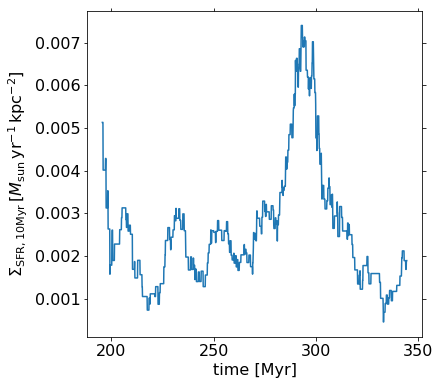

In [43]:
plt.plot(h['time'], h['sfr10'])
plt.setp(plt.gca(), xlabel='time [Myr]',
         ylabel=r'$\Sigma_{\rm SFR,10Myr}\,[M_{\rm sun}\,{\rm yr}^{-1}\,{\rm kpc}^{-2}]$')

### Read zprof dump

source code: `dump_zprof

In [5]:
s = sa.set_model('R8_16pc')

In [53]:
s.files.keys()

dict_keys(['athinput', 'timeit', 'hst', 'sn', 'vtk', 'vtk_id0', 'starpar_vtk', 'zprof', 'rst'])

In [6]:
zp = s.read_zprof(phase='whole')

/tigress/changgoo/TIGRESS-NCR/R8_16pc_NCR.full/zprof/R8_8pc_NCR.whole.zprof.nc


LoadSimTIGRESSNCR-WARNING: [read_zprof]: Could not netcdf to /tigress/changgoo/TIGRESS-NCR/R8_16pc_NCR.full/zprof/R8_8pc_NCR.whole.zprof.R8_16pc_NCR.full.mod.nc.


In [8]:
zp.var

TypeError: 'method' object is not iterable

Text(0, 0.5, '$\\langle n_{\\rm H}\\rangle\\;[{\\rm cm}^{-3}]$')

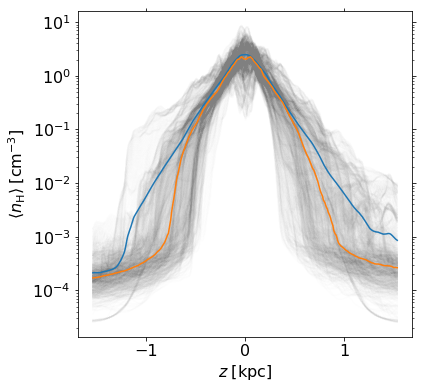

In [69]:
y = zp['d']
plt.semilogy(zp.z_kpc, y, alpha=0.01, c='grey')
plt.plot(zp.z_kpc, y.mean(dim='time'), label='mean')
plt.plot(zp.z_kpc, y.median(dim='time'), label='median')
plt.xlabel(r'$z\;[{\rm kpc}]$')
plt.ylabel(r'$\langle n_{\rm H}\rangle\;[{\rm cm}^{-3}]$')
#plt.legend(loc=3, fontsize=12)

# Reading starpar vtk

In [2]:
s = sa.set_model('R8_16pc')

In [4]:
print(len(s.nums),s.nums[-1])

683 1000
